Convolutional neural network (CNN) (Any One from the following)
 Use any dataset of plant disease and design a plant disease detection system using CNN.
 Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report



In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
model = keras.Sequential()


In [6]:
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
!pip install pydot
history = model.fit(X_train, y_train, epochs=12, batch_size=32)


Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.8252 - loss: 0.4869
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9082 - loss: 0.2544
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9255 - loss: 0.2031
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9368 - loss: 0.1721
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9477 - loss: 0.1419
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9551 - loss: 0.1205
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9645 - loss: 0.0979
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9694 - loss: 0.0832
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9742 - loss: 0.0720
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9791 - loss: 0.0589
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9828 - loss: 0.0498
Epoch 12

In [9]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0389
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9059 - loss: 0.3902


In [10]:
print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))
print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))


Train accuracy: 0.98662
Train loss: 0
Test accuracy: 0.9075
Test loss: 0.386


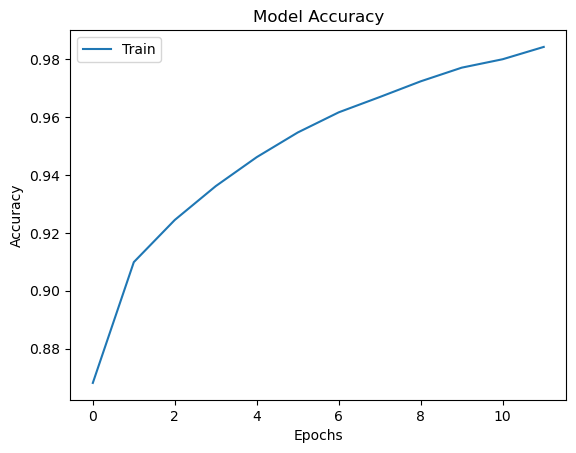

In [11]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [12]:
import cv2
import numpy as np

In [13]:
# Load and preprocess custom data
custom_image_path = 'C:\\Users\\shruti\\Desktop\\DL Practicals\\handbag.jpg'
custom_image = cv2.imread(custom_image_path, cv2.IMREAD_GRAYSCALE)
custom_image = cv2.resize(custom_image, (28, 28))
custom_image = custom_image.reshape((1, 28, 28, 1)) / 255.0
# Make predictions
predictions = model.predict(custom_image)
predicted_class = np.argmax(predictions)
# Display the predicted class
print("Predicted Class:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Class: Bag
